<a href="https://colab.research.google.com/github/MehwishSameer/Machine-Learning/blob/main/Scikit_Learn(Full_Guide).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

**1. Plot a Graph:**

In [ ]:
x=[i for i in range(-5,6)]
print(x)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


In [ ]:
y=[i**2 for i in range(-5,6)]
print(y)

[25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25]


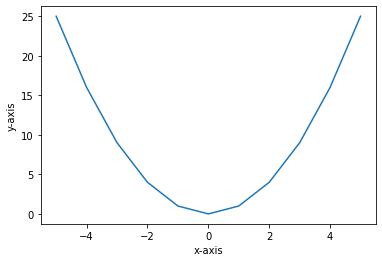

In [ ]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y)

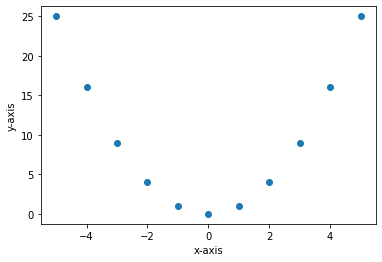

In [ ]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.scatter(x,y)

**2.Train Test Split:**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
iris=datasets.load_iris()
X=iris.data
y=iris.target
print(X.shape,y.shape)

(150, 4) (150,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


**3. KNN:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn import neighbors,metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = 'gdrive/My Drive/car.data'
data = pd.read_csv(path)
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [ ]:
Features = data[[
        'buying',
        'maint',
        'safety'
]].values

In [ ]:
Label = data[['class']] 

In [ ]:
#Converting the data
Le = LabelEncoder()
for i in range(len(Features[0])):
  Features[:,i] = Le.fit_transform(Features[:,i])
print(Features)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [ ]:
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
Label['class']=Label['class'].map(label_mapping)
Label=np.array(Label)
print(Label)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#create model to predict whether the car is unaccountable, accountable, good or very good on the basis of price, maintainance and safety
knn = neighbors.KNeighborsClassifier(n_neighbors=25,weights='uniform')
X_train1,X_test1,y_train1,y_test1=train_test_split(Features,Label,test_size=0.2)
knn.fit(X_train1,y_train1)
prediction=knn.predict(X_test1)
accuracy=metrics.accuracy_score(y_test1,prediction)
print(prediction)
print(accuracy)
print(Label[35],knn.predict(Features)[35]) #testing true and predicted value

[0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 3 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 3 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 3 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 3 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 3 0 0 1 0 1 0 0 1 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0]
0.7687861271676301
[0] 0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**4. SVM:**

For more description and detailed maths behind it: https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb

In [ ]:
from sklearn import svm

In [ ]:
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
model = svm.SVC()
model.fit(X_train,y_train)
predictions1 = model.predict(X_test)
accuracy1 = metrics.accuracy_score(y_test,predictions1)
print(y_test)                                 #actual
print(predictions1)                           #predicted
print(accuracy1)

[1 2 1 1 2 1 2 1 1 1 1 0 2 0 0 1 1 1 1 1 0 2 0 0 0 1 0 1 2 2]
[1 2 1 1 2 1 2 1 1 1 2 0 2 0 0 1 1 1 1 1 0 2 0 0 0 1 0 1 2 2]
0.9666666666666667


In [ ]:
for i in range(len(predictions1)):
  print(classes[predictions1[i]])

Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Virginica
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Setosa
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Virginica
Iris Virginica


**5. Linear Regression:**

In [ ]:
from sklearn import linear_model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

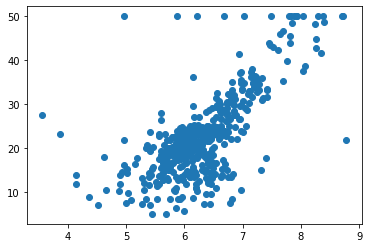

In [ ]:
boston = datasets.load_boston()
X_b = boston.data
y_b = boston.target
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2)
plt.scatter(X_b.T[5],y_b)
plt.show()

In [ ]:
l_reg = linear_model.LinearRegression()
model_b = l_reg.fit(X_b_train, y_b_train)
predictions2 = model_b.predict(X_b_test)
print(predictions2)                    #Predictions
print(l_reg.score(X_b, y_b))           #If R^2 values are smaller then it shows that points are scattered else it shows that points are close
print(l_reg.coef_)                     #Coeff
print(l_reg.intercept_)                #Intercept

[23.64008327 16.62707204 19.16636311 16.39746738 17.98256436 23.9657219
 13.42043527 22.60626521 30.62248171 28.05589522 23.22104698 18.89349745
 36.52937067 21.67349774 24.22560321 19.47500037 18.52753531 30.67323212
 31.46842922 20.66179808 15.1859045  20.06938776 13.77773906 24.81103843
 19.30592916 28.30794173 12.14337196 29.62317476 33.81877756 22.40262746
 20.10708457 22.44910308 12.85061925 15.65922935 15.88344028 28.38987395
 32.87067133 23.27820073 24.56694755 40.80449389 15.8579395  29.07161719
  8.38945252 21.67419727 28.80741653 18.98941652 20.02207046 27.39169353
 29.03569169 22.10114034 25.16472312 39.17169598 10.04841632 25.10944053
 20.28152681  9.56602405 22.21306119 23.349672   22.02021854 18.46209665
 24.82099745 -4.26120787 23.7395771  27.30458912 25.25640008 18.56967393
 20.12823129 33.63296182 22.60426324 22.0462733  25.01023033 20.96477426
 20.8316738  39.87712751 23.5664931  19.53931997 21.66446447 21.0956559
 25.76498394 26.85569912 17.18468018 27.79553929 21.8

**6. Logistic vs Linear Regression:**
*   Hyperplanes: That separate two clusters (group of data points/ Labels)
*   The difference between clustering and classifications is that 
classification model trains with labels and clustering models don't.
*   **Logistic regression(second order optimization)** finds where the derivative of function equals to zero whereas **root finding method** finds where the function equals to zero.
*   Two cases of optimization functions:


1.   1-D: We can obtain a quadratic approximation at a given point of function using Taylor series expansion. So we'd take the second order Taylor series for our initial point x, and minimize it by finding the first and second derivative and equating them to zero.
We iterate the above process to find minimum x-value.
2.   2-D:Everything is same as in 1-D except that we replace the first derivatives with gradients and second derivative with hessian.

Derivates-> Gradients-> Jacobian matrix(1st order optimization)/Hessian(2nd order optimization)

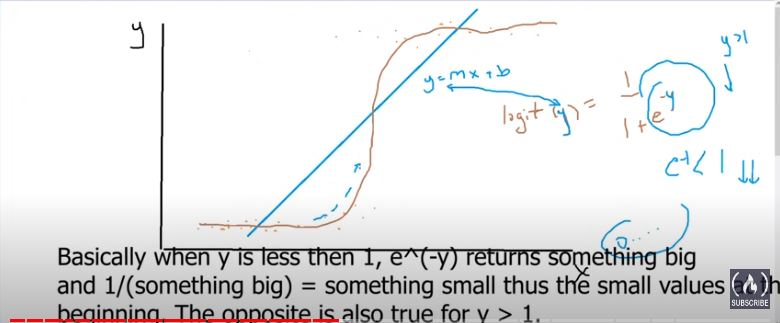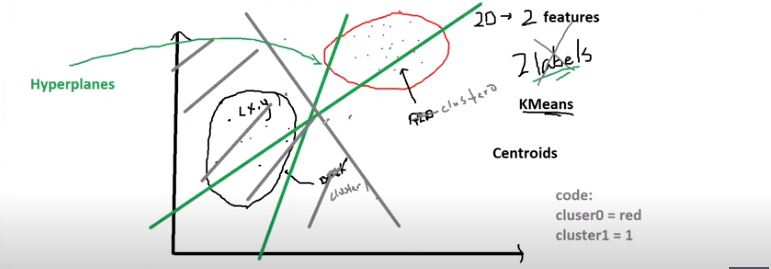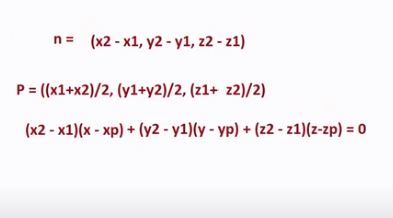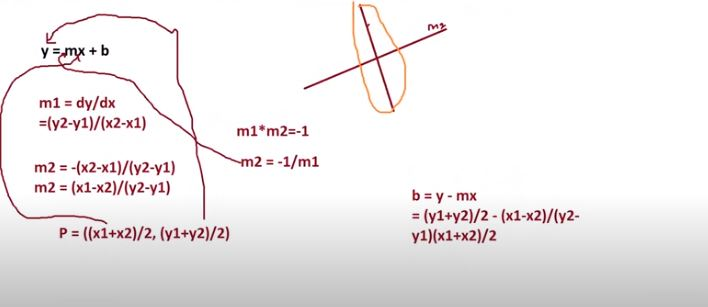

**7. KMeans:**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

In [ ]:
bc = load_breast_cancer()
x_bc = scale(bc.data)      #Cleans data
y_bc = bc.target 
x_bc_train, x_bc_test, y_bc_train, y_bc_test = train_test_split(x_bc, y_bc, test_size=0.2)
model_bc = KMeans(n_clusters=2, random_state=0)
model_bc.fit(x_bc_train)
predictions_bc = model_bc.predict(x_bc_test)
labels_bc = model_bc.labels_

In [ ]:
print(labels_bc)
print(accuracy_score(y_bc_test, predictions_bc))
print(predictions_bc)             #predicted value where 0 is represented by 1 and 1 by 0 as intially we haven't defined anything
print(y_bc_test)                  #actual value 

[1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 0]
0.9385964912280702
[0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 

**8. Neural Networks:**
*   "A" is basically obtained from adding a bunch of linear functions.
*   Neural Networks with more than one activation function are used to implement various combinations and patterns and see their result.
*   Different weights(w) and biases(b) are augmented to provide accurate results by adjusting the weight(effect) of x on the function.
*   Neural networks can be used for tests such as classification like image recognition, text classification like whether an email is spam or not, regression, clustering, chatbots etc.
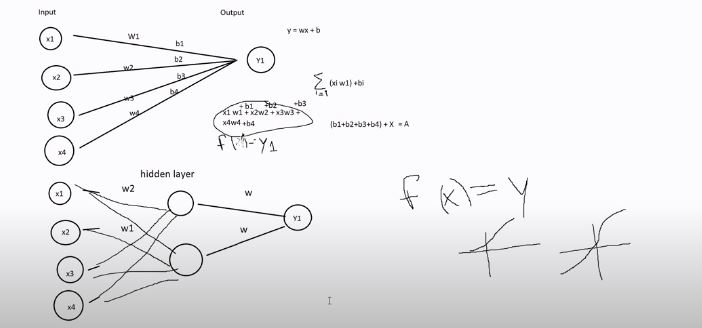

**9. Overfitting and Underfitting :**

*   **Underfitting(too simple)** reasons can be low training set data or we are using wrong kind of activation function.
*   High variance on training and testing data and error is too high.
*   Over-simplifying our model.

---


*   **Overfitting(too complicated)** when model just memorize the training data and make a curve on it.
*   Low variance on training data but high variance on testing data and error is too high.

---

*   Both are the conditions which give large error.
*   The **perfect fit** has low variance(error) on training and testing datasets.


**10. Cost Function and Gradient Descent:**

*   The cost function reduces error by telling neural network how bad results is and neural networks learns by training over and over again. 
*   The larger the difference between actual(y) and predicted(y^) value the more correct output is.
*   Gradient function is used to minimize the cost function.
*   *5 steps of Gradient Descent:*

1.   Define a model
2.   Define an error
3.   Compute a gradient using our error
4.   Update our weights using our gradient
5.   Repeat steps 1-4 until gradient equals to 0
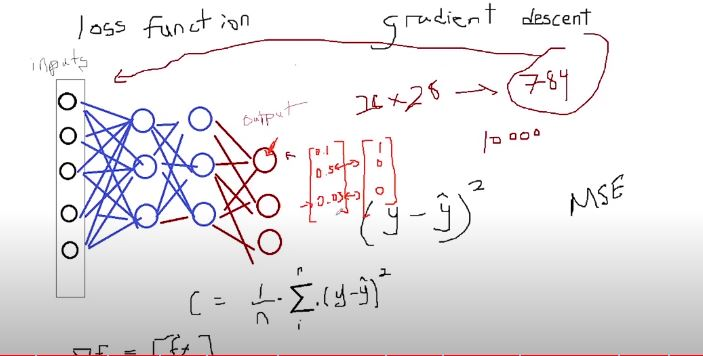
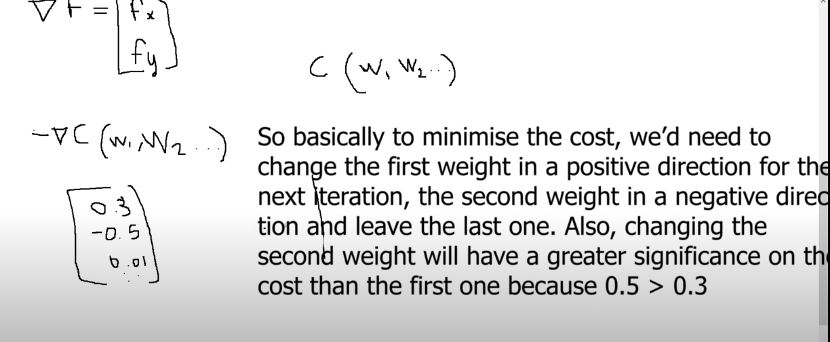

**11. Backpropagation:**


*   Algorithm to calculate the weights or the change we have to apply to the weights to minimize the cost.
*   Taking the information from output layers and going backwards to certain weights.
*   Outputs are composition function of all the activation functions of hidden layers.
*   In the image below z is what we called X in neural networks which is the sum of the weights and biases. E for error, w for weights and a for activation functions.
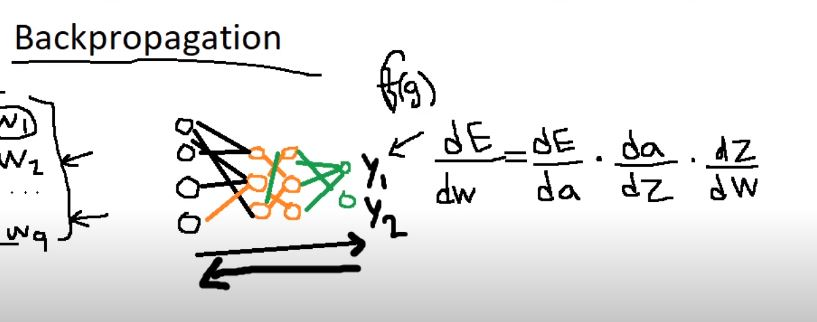


**12. CNN:**
*   Convolution Layer is different from normal layers in a way that it adds a filter which allows the layer to detect patterns(Image recogonition).

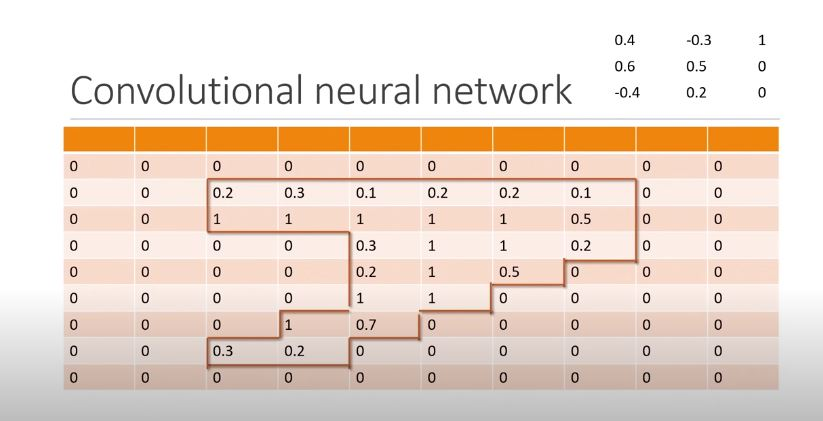

In the image below; -1 are for dark, 1 for white and 0 for grey.

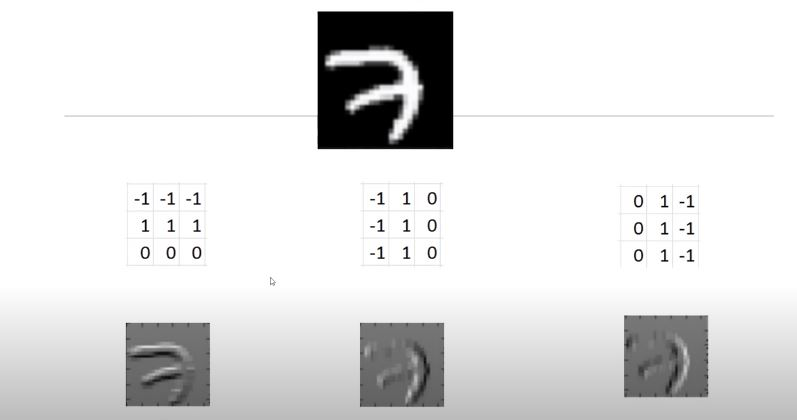